# 1 Million Points Regression Example

### Key take-aways
- `tf.Variable()`
- `tf.placeholder()`
- Feed data into training in ***batches***
- `tf.train.GradientDescentOptimizer()`

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

#### Generate some random data

In [16]:
x_data = np.linspace(0.0, 10.0, 1000000)
len(x_data)

1000000

Assume the underling relationship between $x$ and $y$ is  
$y = 0.5 x + 5$

In [17]:
noise = np.random.randn(len(x_data))
y_obs = (0.5* x_data) + 5 + noise          # The observed y contains noise
len(y_obs)

1000000

1 million rows of data is too big to plot. We concatinate `x_data` and `y_obs` to a Pandas DataFrame, so it's easier to sample a small subset of the data and plot it.

In [18]:
my_data = pd.DataFrame({'X': x_data, 'Y':y_obs})
print(my_data.shape)
my_data.head()

(1000000, 2)


,X,Y
0,0.00000,6.483210
1,0.00001,4.489104
2,0.00002,4.010442
3,0.00003,6.011029
4,0.00004,4.704090


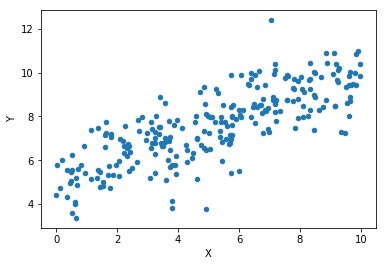

In [19]:
my_data.sample(n=250).plot(kind='scatter', x='X', y='Y')

#### Create a TensorFlow model

Because feeding 1 million training samples all together into the model is difficult on the traing, we instead feed training data in batches. Here we defind a batch size, that is, how many training sample to feed into the training each time.

In [66]:
batch_size = 20

Create **Variables**

In [67]:
m = tf.Variable(1.0)
b = tf.Variable(0.5)

Create **Placeholders**

In [68]:
xph = tf.placeholder(tf.float32, shape=[batch_size])
yph = tf.placeholder(tf.float32, shape=[batch_size])

In [69]:
y_model = m*xph + b

In [70]:
error = tf.reduce_sum(tf.square(yph-y_model))

In [71]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
train = optimizer.minimize(error)

In [72]:
init = tf.global_variables_initializer()

In [76]:
with tf.Session() as sess:
    sess.run(init)
    n_batches = 10000
    for i in range(n_batches):
        sample = my_data.sample(n=batch_size)
        feed_dict = {xph: sample['X'].values, yph: sample['Y'].values}
        sess.run(train, feed_dict=feed_dict)
    model_m, model_b = sess.run([m,b])

In [77]:
model_m

0.55634773

In [78]:
model_b

5.0059748

Visualize the results

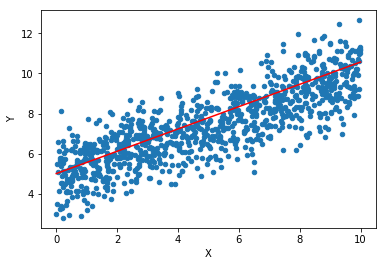

In [80]:
y_hat = x_data*model_m + model_b
my_data.sample(n=1000).plot.scatter(x='X', y='Y')
plt.plot(x_data, y_hat, 'r')